In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar

In [2]:
groc_data=pd.read_excel("D:\Aman\Python\groceries.xlsx",header=None)
data = pd.DataFrame(groc_data)
data
# data.fillna(0)# used to do 0 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape #used to see col and row

(9835, 32)

In [4]:
# data.describe() to see count ,etc
# data[0]
# data.dtypes
# data_rows_duplicate=data[data.duplicated()]
# print(data_rows_duplicate)
# data.count()
unique=(data[0].unique())
print(len(unique))

158


In [6]:
encode_vals=[]
# print(set(unique))

for i,r in data.iterrows():
    labels={}
    not_there = list(set(unique) - set(r))
    there = list(set(unique).intersection(r))
    for nt in not_there:
        labels[nt]=0
    for t in there:
        labels[t]=1
    encode_vals.append(labels)
encode_vals[0]
encoded_data=pd.DataFrame(encode_vals)
encoded_data

,tropical fruit,canned fruit,butter milk,soap,brandy,specialty bar,berries,sliced cheese,cereals,other vegetables,...,frozen potato products,spread cheese,organic products,pet care,dishes,packaged fruit/vegetables,frozen meals,margarine,semi-finished bread,citrus fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# print(data[0])
print(data[0].value_counts().head())

sausage             825
whole milk          717
frankfurter         580
tropical fruit      482
other vegetables    460
Name: 0, dtype: int64


In [31]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,female sanitary products,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


Text(0, 0.5, 'Support')

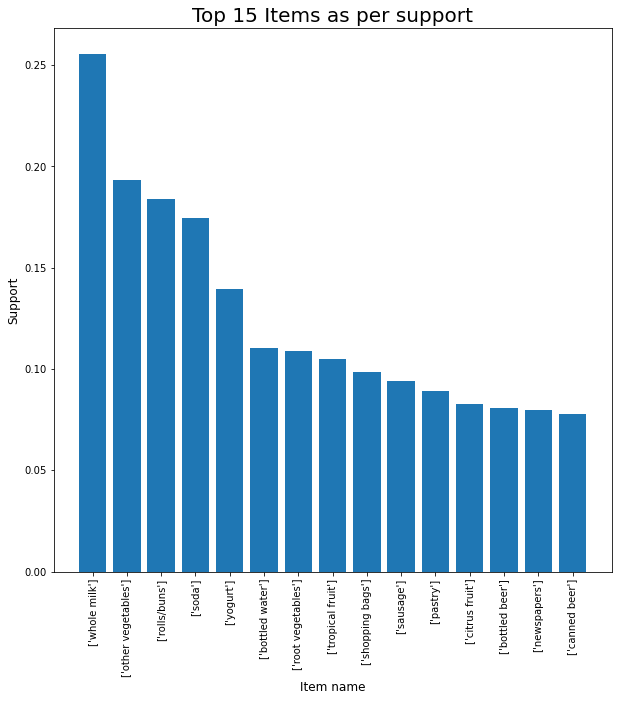

In [78]:
freq_items=ap(encoded_data,min_support=0.007,use_colnames=True)
# freq_items
most_pop_items=freq_items.sort_values('support',ascending=False)
# most_pop_items
most_pop_items=most_pop_items.head(15)

for i in range (len(most_pop_items.itemsets)):
    most_pop_items.itemsets.iloc[i]=str(list(most_pop_items.itemsets.iloc[i]))

fig=plt.figure(figsize=(10,10))
grph=fig.add_subplot(111)
grph.bar(most_pop_items.itemsets,most_pop_items.support)
for label in grph.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.title('Top 15 Items as per support',fontsize=20)
plt.xlabel('Item name',fontsize=12)
plt.ylabel('Support',fontsize=12)

In [69]:
association_confi=ar(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
1060,"(butter, yogurt)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
1054,"(root vegetables, butter)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
1245,"(tropical fruit, other vegetables, yogurt)",(whole milk),0.007626,0.619835,2.425816,0.004482,1.958317
1257,"(root vegetables, other vegetables, yogurt)",(whole milk),0.007829,0.606299,2.372842,0.004530,1.890989
1155,"(root vegetables, domestic eggs)",(whole milk),0.008541,0.595745,2.331536,0.004878,1.841618
943,"(root vegetables, citrus fruit)",(other vegetables),0.010371,0.586207,3.029608,0.006948,1.949059
1232,"(tropical fruit, root vegetables, whole milk)",(other vegetables),0.007016,0.584746,3.022057,0.004694,1.942201
721,"(tropical fruit, root vegetables)",(other vegetables),0.012303,0.584541,3.020999,0.008231,1.941244
1175,"(curd, yogurt)",(whole milk),0.010066,0.582353,2.279125,0.005649,1.782567
1045,"(root vegetables, pip fruit)",(whole milk),0.008948,0.575163,2.250988,0.004973,1.752401


In [70]:
association_supp=ar(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head(10)


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
2,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157
3,(yogurt),(whole milk),0.056024,0.401603,1.571735,0.020379,1.244132
